# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [2]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /home/rodney/miniconda3/envs/udacity/bin/python
cachedir: .pytest_cache
rootdir: /home/rodney/ML_Udacity/LandClassifier
plugins: anyio-3.7.1
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

=============================== warnings summary ===============================
src/transfer.py::test_get_model_transfer_learning
src/transfer.py::test_get_model_transfer_learning
src/transfer.py::test_get_model_transfer_learning
src/transfer.py::test_get_model_transfer_learning
src/transfer.py::test_get_model_transfer_learning
  /home/rodney/miniconda3/envs/udacity/lib/python3.7/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(module.__versio

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [3]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

In [4]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="resnet18")

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=False
)

Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 1 	Training Loss: 2.835866 	Validation Loss: 1.880714
New minimum validation loss: 1.880714. Saving model ...



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 2 	Training Loss: 1.734472 	Validation Loss: 1.382465
New minimum validation loss: 1.382465. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [01:22<00:00,  1.31s/it]


Epoch: 3 	Training Loss: 1.456513 	Validation Loss: 1.260435
New minimum validation loss: 1.260435. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:28<00:00,  2.17it/s]


Epoch: 4 	Training Loss: 1.298189 	Validation Loss: 1.146170
New minimum validation loss: 1.146170. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:29<00:00,  2.12it/s]

Epoch: 5 	Training Loss: 1.218029 	Validation Loss: 1.149797



Validating: 100%|███████████████████████████████| 63/63 [00:29<00:00,  2.10it/s]


Epoch: 6 	Training Loss: 1.201184 	Validation Loss: 0.966151
New minimum validation loss: 0.966151. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:37<00:00,  1.68it/s]

Epoch: 7 	Training Loss: 1.086900 	Validation Loss: 1.021692



Validating: 100%|███████████████████████████████| 63/63 [00:33<00:00,  1.89it/s]


Epoch: 8 	Training Loss: 1.039751 	Validation Loss: 0.890788
New minimum validation loss: 0.890788. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:30<00:00,  2.09it/s]


Epoch: 9 	Training Loss: 0.979115 	Validation Loss: 0.825365
New minimum validation loss: 0.825365. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:31<00:00,  2.00it/s]


Epoch: 10 	Training Loss: 0.979642 	Validation Loss: 0.846592


Validating: 100%|███████████████████████████████| 63/63 [00:31<00:00,  1.97it/s]


Epoch: 11 	Training Loss: 0.909475 	Validation Loss: 0.806957
New minimum validation loss: 0.806957. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:31<00:00,  1.99it/s]


Epoch: 12 	Training Loss: 0.861329 	Validation Loss: 0.743136
New minimum validation loss: 0.743136. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:32<00:00,  1.95it/s]


Epoch: 13 	Training Loss: 0.799460 	Validation Loss: 0.730256
New minimum validation loss: 0.730256. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:36<00:00,  1.71it/s]


Epoch: 14 	Training Loss: 0.777078 	Validation Loss: 0.694243
New minimum validation loss: 0.694243. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:32<00:00,  1.97it/s]


Epoch: 15 	Training Loss: 0.794614 	Validation Loss: 0.641982
New minimum validation loss: 0.641982. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:31<00:00,  2.00it/s]

Epoch: 16 	Training Loss: 0.750980 	Validation Loss: 0.653672



Validating: 100%|███████████████████████████████| 63/63 [00:31<00:00,  1.99it/s]


Epoch: 17 	Training Loss: 0.731645 	Validation Loss: 0.629934
New minimum validation loss: 0.629934. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:32<00:00,  1.94it/s]


Epoch: 18 	Training Loss: 0.719595 	Validation Loss: 0.609591
New minimum validation loss: 0.609591. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:35<00:00,  1.76it/s]


Epoch: 19 	Training Loss: 0.663444 	Validation Loss: 0.555659
New minimum validation loss: 0.555659. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


Epoch: 20 	Training Loss: 0.665694 	Validation Loss: 0.538196
New minimum validation loss: 0.538196. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]

Epoch: 21 	Training Loss: 0.622326 	Validation Loss: 0.553752



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.34it/s]

Epoch: 22 	Training Loss: 0.621141 	Validation Loss: 0.543391



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]


Epoch: 23 	Training Loss: 0.615937 	Validation Loss: 0.492354
New minimum validation loss: 0.492354. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:45<00:00,  1.39it/s]


Epoch: 24 	Training Loss: 0.586540 	Validation Loss: 0.483987
New minimum validation loss: 0.483987. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]


Epoch: 25 	Training Loss: 0.580723 	Validation Loss: 0.471785
New minimum validation loss: 0.471785. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]

Epoch: 26 	Training Loss: 0.544915 	Validation Loss: 0.425633
New minimum validation loss: 0.425633. Saving model ...



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]

Epoch: 27 	Training Loss: 0.556535 	Validation Loss: 0.432487



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.34it/s]

Epoch: 28 	Training Loss: 0.575560 	Validation Loss: 0.453559



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.35it/s]

Epoch: 29 	Training Loss: 0.526267 	Validation Loss: 0.431697



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]

Epoch: 30 	Training Loss: 0.482330 	Validation Loss: 0.433539



Validating: 100%|███████████████████████████████| 63/63 [00:46<00:00,  1.36it/s]

Epoch: 31 	Training Loss: 0.492999 	Validation Loss: 0.442208



Validating: 100%|███████████████████████████████| 63/63 [00:47<00:00,  1.34it/s]

Epoch: 32 	Training Loss: 0.499569 	Validation Loss: 0.398453
New minimum validation loss: 0.398453. Saving model ...



Validating: 100%|███████████████████████████████| 63/63 [00:45<00:00,  1.38it/s]


Epoch: 33 	Training Loss: 0.493789 	Validation Loss: 0.363475
New minimum validation loss: 0.363475. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.63s/it]

Epoch: 34 	Training Loss: 0.479919 	Validation Loss: 0.389948



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.63s/it]

Epoch: 35 	Training Loss: 0.461996 	Validation Loss: 0.364400



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.63s/it]

Epoch: 36 	Training Loss: 0.473710 	Validation Loss: 0.379671



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 37 	Training Loss: 0.460112 	Validation Loss: 0.337008
New minimum validation loss: 0.337008. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 38 	Training Loss: 0.437523 	Validation Loss: 0.329834
New minimum validation loss: 0.329834. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 39 	Training Loss: 0.442351 	Validation Loss: 0.379110



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 40 	Training Loss: 0.419994 	Validation Loss: 0.346443



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 41 	Training Loss: 0.409315 	Validation Loss: 0.326782



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 42 	Training Loss: 0.393062 	Validation Loss: 0.346630



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 43 	Training Loss: 0.404146 	Validation Loss: 0.367821



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 44 	Training Loss: 0.418210 	Validation Loss: 0.316843
New minimum validation loss: 0.316843. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 45 	Training Loss: 0.403890 	Validation Loss: 0.303844
New minimum validation loss: 0.303844. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 46 	Training Loss: 0.407047 	Validation Loss: 0.304344



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 47 	Training Loss: 0.394567 	Validation Loss: 0.314194



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]


Epoch: 48 	Training Loss: 0.392662 	Validation Loss: 0.292922
New minimum validation loss: 0.292922. Saving model ...


Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 49 	Training Loss: 0.379316 	Validation Loss: 0.311998



Validating: 100%|███████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Epoch: 50 	Training Loss: 0.373178 	Validation Loss: 0.303488


<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ 

In the last layer I calculated the output from resnet 18 and divided the number by 8 and 4 respectively to get the number of parameters in my architecture, I see this as a good practice

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [5]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 63/63 [02:45<00:00,  2.62s/it]

Test Loss: 0.297165


Test Accuracy: 90% (3628/3996)


0.29716490232755266

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [7]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


 25%|█████████▊                             | 1250/4996 [00:36<01:49, 34.18it/s]


Accuracy: 0.4544


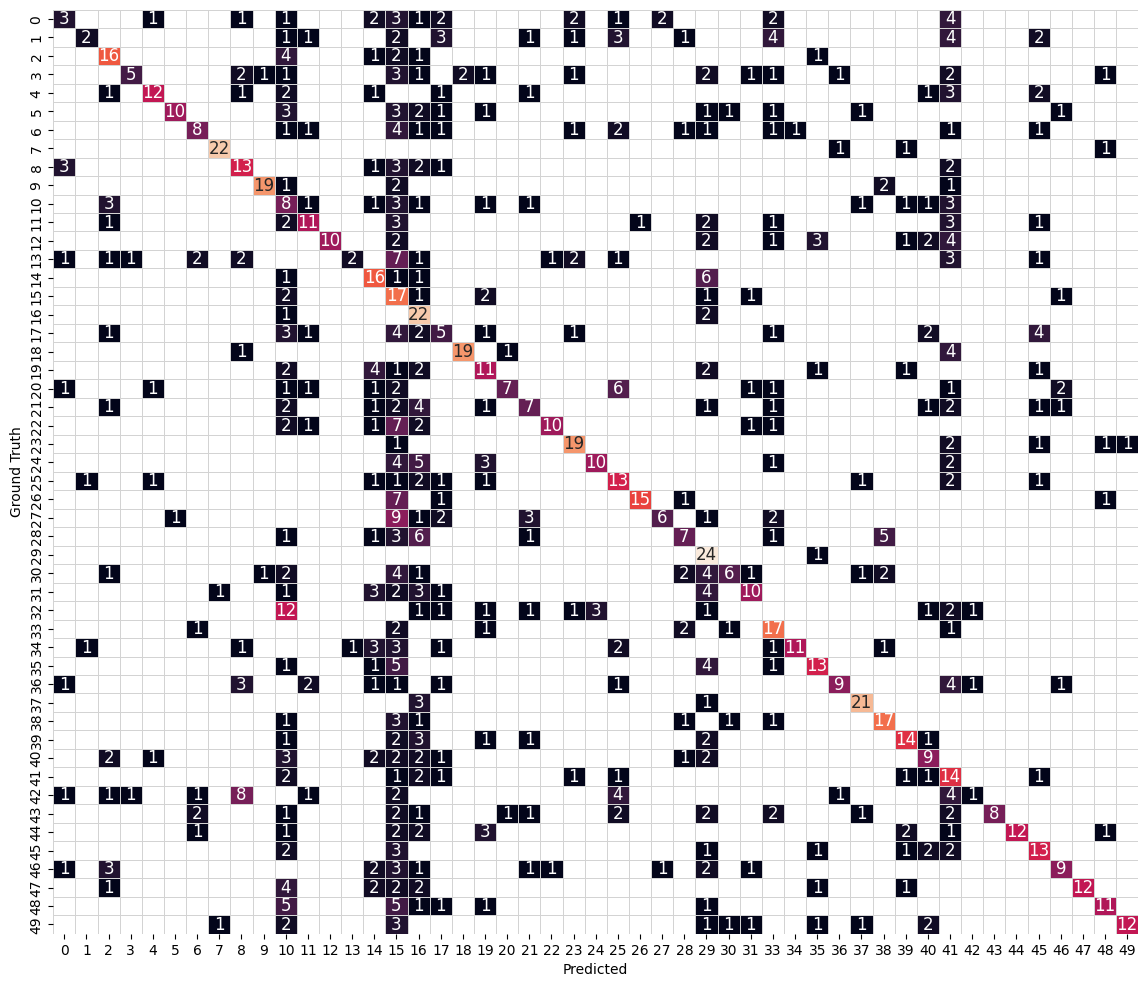

In [9]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)